__author__ = 'Ricardo Pasquini'

# Counting tweets at the hexagon level. Complete procedure

Overview: This code counts georeferenced tweets at the hexagon level. Hexagons are uniquely identified in space. We use Uber's H3 library for this purpose.  
The code  also performs a home location prediction for each user. This allows later counting tweets by whether they were tweeted by residents, residents of neighbors hexagons, or non-residents.
The project was designed to be scalable to millions of tweets. The process is done with MongoDB.

By default the project generates the following collections on the Mongo database:

tweets: Collection containing tweets. This collection is modified by incorporating the corresponding hex id. \
users: Collection containing users. This collection is modified by incorporating the home location data.\
hexcounts: Collection containing counts of tweets.


In [19]:
import sys
sys.path.append("../") 
import databasepopulation
import communicationwmongo as commu
import home_location as home
import analysis as a
import pymongo
import pandas as pd
import my_h3_functions as myh3

In [20]:
import importlib
importlib.reload(databasepopulation)
importlib.reload(home)
importlib.reload(a)
importlib.reload(myh3)

<module 'my_h3_functions' from '..\\my_h3_functions.py'>

# Counting tweets at the hexagon level. Complete procedure

This version of the code assumes that a different database will be used for each city.


If necessary check your current location with the following command:

In [3]:
pwd

'C:\\Users\\emman\\Documents\\git\\twitter_and_displacement\\notebooks'

# 0. Connect to Mongo and define a specific database

By default connect to Mongo running on a localhost. 
Requires manually changing the parameters if working on a cloud environment

I will use the name buenosaires as the db example. Recall each database for each city.


In [4]:
db=commu.connecttoLocaldb(database='twitter_bog')

In [5]:
db.Twitter_Data

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'twitter_bog'), 'Twitter_Data')

# 1. Raw data to Mongo
This function populates the files containing tweets into Mongo.
Assumes files are named like: ba_2012.csv, etc.
Choose start and end years.


In [7]:
databasepopulation.populatetweets(db, path='/Users/emman/Box/Twitter data/Latin America/Bogota/', cityprefix='bo', yearstart=2012, yearend=2012)

Now populating year  2012
process completed


In [9]:
databasepopulation.populatetweets(db, path='/Users/emman/Box/Twitter data/Latin America/Bogota/', cityprefix='bo', yearstart=2015, yearend=2015)

Now populating year  2015
process completed


In [8]:
db.tweets.update({},{'$rename':{"latitude":"lat","longitude":"lon"}}, False,True,True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 6043344, 'nModified': 6043344, 'ok': 1.0, 'updatedExisting': True}

# 2. Adding Hexids to tweets 
This function includes hexagons ids to each tweet.  

In [10]:
databasepopulation.addhexjob(db)

 iter: 1  time: 0.21432971954345703
 iter: 2  time: 0.20003962516784668
 iter: 3  time: 0.19846796989440918
 iter: 4  time: 0.21442866325378418
 iter: 5  time: 0.18553376197814941
 iter: 6  time: 0.2032608985900879
 iter: 7  time: 0.17625689506530762
 iter: 8  time: 0.17800283432006836
 iter: 9  time: 0.1743326187133789
 iter: 10  time: 0.1874091625213623
 iter: 11  time: 0.1921067237854004
 iter: 12  time: 0.1767270565032959
 iter: 13  time: 0.16498112678527832
 iter: 14  time: 0.17645001411437988
 iter: 15  time: 0.18972015380859375
 iter: 16  time: 0.1715071201324463
 iter: 17  time: 0.16318726539611816
 iter: 18  time: 0.20440101623535156
 iter: 19  time: 0.16463136672973633
 iter: 20  time: 0.16850996017456055
 iter: 21  time: 0.165116548538208
 iter: 22  time: 0.17537403106689453
 iter: 23  time: 0.16391253471374512
 iter: 24  time: 0.17087006568908691
 iter: 25  time: 0.18630576133728027
 iter: 26  time: 0.17792057991027832
 iter: 27  time: 0.16702723503112793
 iter: 28  time: 0

 iter: 222  time: 0.18296289443969727
 iter: 223  time: 0.16156768798828125
 iter: 224  time: 0.20070600509643555
 iter: 225  time: 0.16333508491516113
 iter: 226  time: 0.1667327880859375
 iter: 227  time: 0.19642925262451172
 iter: 228  time: 0.1626124382019043
 iter: 229  time: 0.16257810592651367
 iter: 230  time: 0.17618346214294434
 iter: 231  time: 0.16545844078063965
 iter: 232  time: 0.17062783241271973
 iter: 233  time: 0.16196489334106445
 iter: 234  time: 0.1934823989868164
 iter: 235  time: 0.16239714622497559
 iter: 236  time: 0.16697311401367188
 iter: 237  time: 0.15823149681091309
 iter: 238  time: 0.16887426376342773
 iter: 239  time: 0.18719053268432617
 iter: 240  time: 0.1661090850830078
 iter: 241  time: 0.1891322135925293
 iter: 242  time: 0.1684892177581787
 iter: 243  time: 0.16609406471252441
 iter: 244  time: 0.16845941543579102
 iter: 245  time: 0.1620779037475586
 iter: 246  time: 0.17601943016052246
 iter: 247  time: 0.18042373657226562
 iter: 248  time: 0

 iter: 440  time: 0.18834161758422852
 iter: 441  time: 0.16517853736877441
 iter: 442  time: 0.16578269004821777
 iter: 443  time: 0.16071820259094238
 iter: 444  time: 0.18774771690368652
 iter: 445  time: 0.16518163681030273
 iter: 446  time: 0.1718153953552246
 iter: 447  time: 0.16460561752319336
 iter: 448  time: 0.17352867126464844
 iter: 449  time: 0.16551828384399414
 iter: 450  time: 0.1997382640838623
 iter: 451  time: 0.2030048370361328
 iter: 452  time: 0.1694793701171875
 iter: 453  time: 0.1680142879486084
 iter: 454  time: 0.17502522468566895
 iter: 455  time: 0.15926265716552734
 iter: 456  time: 0.16755175590515137
 iter: 457  time: 0.16255617141723633
 iter: 458  time: 0.18950104713439941
 iter: 459  time: 0.15856146812438965
 iter: 460  time: 0.16857242584228516
 iter: 461  time: 0.1625978946685791
 iter: 462  time: 0.16277289390563965
 iter: 463  time: 0.1675124168395996
 iter: 464  time: 0.16339802742004395
 iter: 465  time: 0.18201947212219238
 iter: 466  time: 0

 iter: 659  time: 0.18056273460388184
 iter: 660  time: 0.16135382652282715
 iter: 661  time: 0.19049334526062012
 iter: 662  time: 0.16959428787231445
 iter: 663  time: 0.17841124534606934
 iter: 664  time: 0.1611168384552002
 iter: 665  time: 0.18251609802246094
 iter: 666  time: 0.15941619873046875
 iter: 667  time: 0.16500592231750488
 iter: 668  time: 0.18573570251464844
 iter: 669  time: 0.1616067886352539
 iter: 670  time: 0.16089153289794922
 iter: 671  time: 0.16877365112304688
 iter: 672  time: 0.16954660415649414
 iter: 673  time: 0.16107177734375
 iter: 674  time: 0.16456174850463867
 iter: 675  time: 0.18758106231689453
 iter: 676  time: 0.159531831741333
 iter: 677  time: 0.1674337387084961
 iter: 678  time: 0.1598033905029297
 iter: 679  time: 0.17696523666381836
 iter: 680  time: 0.17956113815307617
 iter: 681  time: 0.17852377891540527
 iter: 682  time: 0.19373846054077148
 iter: 683  time: 0.15995383262634277
 iter: 684  time: 0.16215300559997559
 iter: 685  time: 0.1

 iter: 878  time: 0.1880042552947998
 iter: 879  time: 0.16359758377075195
 iter: 880  time: 0.16303324699401855
 iter: 881  time: 0.16057324409484863
 iter: 882  time: 0.16356253623962402
 iter: 883  time: 0.17597007751464844
 iter: 884  time: 0.17110228538513184
 iter: 885  time: 0.19028186798095703
 iter: 886  time: 0.17258954048156738
 iter: 887  time: 0.16420221328735352
 iter: 888  time: 0.16979289054870605
 iter: 889  time: 0.17304730415344238
 iter: 890  time: 0.1681060791015625
 iter: 891  time: 0.162308931350708
 iter: 892  time: 0.18638134002685547
 iter: 893  time: 0.16074657440185547
 iter: 894  time: 0.16954636573791504
 iter: 895  time: 0.1625051498413086
 iter: 896  time: 0.16098761558532715
 iter: 897  time: 0.17287993431091309
 iter: 898  time: 0.17333650588989258
 iter: 899  time: 0.1994328498840332
 iter: 900  time: 0.16268348693847656
 iter: 901  time: 0.1790306568145752
 iter: 902  time: 0.16318106651306152
 iter: 903  time: 0.16154932975769043
 iter: 904  time: 0

 iter: 1094  time: 0.1642475128173828
 iter: 1095  time: 0.18616771697998047
 iter: 1096  time: 0.16556334495544434
 iter: 1097  time: 0.1655576229095459
 iter: 1098  time: 0.1729443073272705
 iter: 1099  time: 0.16382670402526855
 iter: 1100  time: 0.16260910034179688
 iter: 1101  time: 0.16157221794128418
 iter: 1102  time: 0.1911160945892334
 iter: 1103  time: 0.16031742095947266
 iter: 1104  time: 0.16891765594482422
 iter: 1105  time: 0.17562651634216309
 iter: 1106  time: 0.16554665565490723
 iter: 1107  time: 0.15753865242004395
 iter: 1108  time: 0.16545557975769043
 iter: 1109  time: 0.19248604774475098
 iter: 1110  time: 0.17296695709228516
 iter: 1111  time: 0.16164088249206543
 iter: 1112  time: 0.170975923538208
 iter: 1113  time: 0.15899658203125
 iter: 1114  time: 0.17150473594665527
 iter: 1115  time: 0.16379094123840332
 iter: 1116  time: 0.19851112365722656
 iter: 1117  time: 0.16667556762695312
 iter: 1118  time: 0.18657565116882324
 iter: 1119  time: 0.1623530387878

 iter: 1306  time: 0.17184138298034668
 iter: 1307  time: 0.1741642951965332
 iter: 1308  time: 0.17463469505310059
 iter: 1309  time: 0.16651344299316406
 iter: 1310  time: 0.1692807674407959
 iter: 1311  time: 0.16304731369018555
 iter: 1312  time: 0.2093675136566162
 iter: 1313  time: 0.1706242561340332
 iter: 1314  time: 0.1675548553466797
 iter: 1315  time: 0.16424131393432617
 iter: 1316  time: 0.17473649978637695
 iter: 1317  time: 0.1651923656463623
 iter: 1318  time: 0.17424654960632324
 iter: 1319  time: 0.19685101509094238
 iter: 1320  time: 0.16837501525878906
 iter: 1321  time: 0.15812993049621582
 iter: 1322  time: 0.17106342315673828
 iter: 1323  time: 0.18062448501586914
 iter: 1324  time: 0.17452144622802734
 iter: 1325  time: 0.15754008293151855
 iter: 1326  time: 0.1931593418121338
 iter: 1327  time: 0.16998910903930664
 iter: 1328  time: 0.1751103401184082
 iter: 1329  time: 0.16921019554138184
 iter: 1330  time: 0.17001628875732422
 iter: 1331  time: 0.165517091751

 iter: 1520  time: 0.16954970359802246
 iter: 1521  time: 0.1660163402557373
 iter: 1522  time: 0.18961620330810547
 iter: 1523  time: 0.15891647338867188
 iter: 1524  time: 0.1760270595550537
 iter: 1525  time: 0.20731496810913086
 iter: 1526  time: 0.18602466583251953
 iter: 1527  time: 0.1653914451599121
 iter: 1528  time: 0.1787254810333252
 iter: 1529  time: 0.1964855194091797
 iter: 1530  time: 0.16857051849365234
 iter: 1531  time: 0.16862869262695312
 iter: 1532  time: 0.17966175079345703
 iter: 1533  time: 0.17359709739685059
 iter: 1534  time: 0.17311310768127441
 iter: 1535  time: 0.16490864753723145
 iter: 1536  time: 0.19547772407531738
 iter: 1537  time: 0.16910552978515625
 iter: 1538  time: 0.19053220748901367
 iter: 1539  time: 0.16790556907653809
 iter: 1540  time: 0.18922853469848633
 iter: 1541  time: 0.16565799713134766
 iter: 1542  time: 0.1764991283416748
 iter: 1543  time: 0.20257019996643066
 iter: 1544  time: 0.17597317695617676
 iter: 1545  time: 0.1818771362

 iter: 1734  time: 0.18949627876281738
 iter: 1735  time: 0.18506717681884766
 iter: 1736  time: 0.18302226066589355
 iter: 1737  time: 0.2114408016204834
 iter: 1738  time: 0.19547581672668457
 iter: 1739  time: 0.2622997760772705
 iter: 1740  time: 0.1924889087677002
 iter: 1741  time: 0.18749785423278809
 iter: 1742  time: 0.17632389068603516
 iter: 1743  time: 0.18704986572265625
 iter: 1744  time: 0.18024373054504395
 iter: 1745  time: 0.17656612396240234
 iter: 1746  time: 0.2047586441040039
 iter: 1747  time: 0.17154836654663086
 iter: 1748  time: 0.1870105266571045
 iter: 1749  time: 0.16539788246154785
 iter: 1750  time: 0.19558334350585938
 iter: 1751  time: 0.1833052635192871
 iter: 1752  time: 0.17357397079467773
 iter: 1753  time: 0.1972658634185791
 iter: 1754  time: 0.1864030361175537
 iter: 1755  time: 0.1778552532196045
 iter: 1756  time: 0.17844533920288086
 iter: 1757  time: 0.16883134841918945
 iter: 1758  time: 0.18056917190551758
 iter: 1759  time: 0.1811139583587

 iter: 1946  time: 0.1840367317199707
 iter: 1947  time: 0.18151450157165527
 iter: 1948  time: 0.1815485954284668
 iter: 1949  time: 0.2090592384338379
 iter: 1950  time: 0.17852067947387695
 iter: 1951  time: 0.18253874778747559
 iter: 1952  time: 0.18690705299377441
 iter: 1953  time: 0.1955251693725586
 iter: 1954  time: 0.1779799461364746
 iter: 1955  time: 0.18242120742797852
 iter: 1956  time: 0.2122189998626709
 iter: 1957  time: 0.1774125099182129
 iter: 1958  time: 0.18684840202331543
 iter: 1959  time: 0.17493176460266113
 iter: 1960  time: 0.18551087379455566
 iter: 1961  time: 0.18140316009521484
 iter: 1962  time: 0.17686820030212402
 iter: 1963  time: 0.20246124267578125
 iter: 1964  time: 0.17916035652160645
 iter: 1965  time: 0.1837599277496338
 iter: 1966  time: 0.1893630027770996
 iter: 1967  time: 0.1959085464477539
 iter: 1968  time: 0.17578864097595215
 iter: 1969  time: 0.178422212600708
 iter: 1970  time: 0.2018582820892334
 iter: 1971  time: 0.17748141288757324

 iter: 2159  time: 0.20347118377685547
 iter: 2160  time: 0.18754839897155762
 iter: 2161  time: 0.1825559139251709
 iter: 2162  time: 0.17748427391052246
 iter: 2163  time: 0.182511568069458
 iter: 2164  time: 0.1806020736694336
 iter: 2165  time: 0.1814744472503662
 iter: 2166  time: 0.20296692848205566
 iter: 2167  time: 0.1804368495941162
 iter: 2168  time: 0.19849491119384766
 iter: 2169  time: 0.18750500679016113
 iter: 2170  time: 0.2034447193145752
 iter: 2171  time: 0.1914966106414795
 iter: 2172  time: 0.19945883750915527
 iter: 2173  time: 0.20251703262329102
 iter: 2174  time: 0.19455909729003906
 iter: 2175  time: 0.18857407569885254
 iter: 2176  time: 0.1860356330871582
 iter: 2177  time: 0.17883014678955078
 iter: 2178  time: 0.1870403289794922
 iter: 2179  time: 0.17838716506958008
 iter: 2180  time: 0.20999860763549805
 iter: 2181  time: 0.17735671997070312
 iter: 2182  time: 0.18849921226501465
 iter: 2183  time: 0.18541932106018066
 iter: 2184  time: 0.19968390464782

 iter: 2371  time: 0.18051743507385254
 iter: 2372  time: 0.1805589199066162
 iter: 2373  time: 0.17994475364685059
 iter: 2374  time: 0.19346880912780762
 iter: 2375  time: 0.18681907653808594
 iter: 2376  time: 0.21644139289855957
 iter: 2377  time: 0.1819591522216797
 iter: 2378  time: 0.2030038833618164
 iter: 2379  time: 0.1942272186279297
 iter: 2380  time: 0.21693038940429688
 iter: 2381  time: 0.21682000160217285
 iter: 2382  time: 0.24164485931396484
 iter: 2383  time: 0.24611544609069824
 iter: 2384  time: 0.18861055374145508
 iter: 2385  time: 0.18854379653930664
 iter: 2386  time: 0.18115973472595215
 iter: 2387  time: 0.2045755386352539
 iter: 2388  time: 0.173539400100708
 iter: 2389  time: 0.1830153465270996
 iter: 2390  time: 0.201460599899292
 iter: 2391  time: 0.17453455924987793
 iter: 2392  time: 0.18554353713989258
 iter: 2393  time: 0.1768801212310791
 iter: 2394  time: 0.17986154556274414
 iter: 2395  time: 0.18383145332336426
 iter: 2396  time: 0.179022789001464

 iter: 2583  time: 0.2477257251739502
 iter: 2584  time: 0.2264392375946045
 iter: 2585  time: 0.1958904266357422
 iter: 2586  time: 0.23170804977416992
 iter: 2587  time: 0.17703914642333984
 iter: 2588  time: 0.179520845413208
 iter: 2589  time: 0.17515182495117188
 iter: 2590  time: 0.18514585494995117
 iter: 2591  time: 0.17275691032409668
 iter: 2592  time: 0.17955851554870605
 iter: 2593  time: 0.19851422309875488
 iter: 2594  time: 0.18056559562683105
 iter: 2595  time: 0.18950104713439941
 iter: 2596  time: 0.18051791191101074
 iter: 2597  time: 0.1899266242980957
 iter: 2598  time: 0.17795181274414062
 iter: 2599  time: 0.17852091789245605
 iter: 2600  time: 0.20046210289001465
 iter: 2601  time: 0.17412018775939941
 iter: 2602  time: 0.17199921607971191
 iter: 2603  time: 0.1764085292816162
 iter: 2604  time: 0.1736156940460205
 iter: 2605  time: 0.18847370147705078
 iter: 2606  time: 0.18969988822937012
 iter: 2607  time: 0.22081446647644043
 iter: 2608  time: 0.185599327087

 iter: 2796  time: 0.20645523071289062
 iter: 2797  time: 0.18444228172302246
 iter: 2798  time: 0.18393325805664062
 iter: 2799  time: 0.1785447597503662
 iter: 2800  time: 0.1850299835205078
 iter: 2801  time: 0.20168161392211914
 iter: 2802  time: 0.19607901573181152
 iter: 2803  time: 0.20370244979858398
 iter: 2804  time: 0.18849444389343262
 iter: 2805  time: 0.18790292739868164
 iter: 2806  time: 0.17617535591125488
 iter: 2807  time: 0.1758882999420166
 iter: 2808  time: 0.17912960052490234
 iter: 2809  time: 0.18143796920776367
 iter: 2810  time: 0.2027440071105957
 iter: 2811  time: 0.18241024017333984
 iter: 2812  time: 0.19193315505981445
 iter: 2813  time: 0.1789717674255371
 iter: 2814  time: 0.1897907257080078
 iter: 2815  time: 0.17845797538757324
 iter: 2816  time: 0.19955945014953613
 iter: 2817  time: 0.21653008460998535
 iter: 2818  time: 0.1833348274230957
 iter: 2819  time: 0.18188786506652832
 iter: 2820  time: 0.19846868515014648
 iter: 2821  time: 0.17369627952

 iter: 3010  time: 0.17408466339111328
 iter: 3011  time: 0.17675995826721191
 iter: 3012  time: 0.19710731506347656
 iter: 3013  time: 0.2161264419555664
 iter: 3014  time: 0.1874544620513916
 iter: 3015  time: 0.17944955825805664
 iter: 3016  time: 0.16672754287719727
 iter: 3017  time: 0.17779278755187988
 iter: 3018  time: 0.17917966842651367
 iter: 3019  time: 0.17910385131835938
 iter: 3020  time: 0.20893239974975586
 iter: 3021  time: 0.19923615455627441
 iter: 3022  time: 0.186293363571167
 iter: 3023  time: 0.1781609058380127
 iter: 3024  time: 0.1775650978088379
 iter: 3025  time: 0.17947959899902344
 iter: 3026  time: 0.1705920696258545
 iter: 3027  time: 0.21741819381713867
 iter: 3028  time: 0.2024855613708496
 iter: 3029  time: 0.2134416103363037
 iter: 3030  time: 0.27394652366638184
 iter: 3031  time: 0.1809701919555664
 iter: 3032  time: 0.18111133575439453
 iter: 3033  time: 0.16954565048217773
 iter: 3034  time: 0.2014620304107666
 iter: 3035  time: 0.167551994323730

 iter: 3222  time: 0.1725761890411377
 iter: 3223  time: 0.20413851737976074
 iter: 3224  time: 0.1748952865600586
 iter: 3225  time: 0.17653131484985352
 iter: 3226  time: 0.17214083671569824
 iter: 3227  time: 0.17174553871154785
 iter: 3228  time: 0.1842026710510254
 iter: 3229  time: 0.17379355430603027
 iter: 3230  time: 0.20046353340148926
 iter: 3231  time: 0.18119478225708008
 iter: 3232  time: 0.17321515083312988
 iter: 3233  time: 0.1681506633758545
 iter: 3234  time: 0.1731548309326172
 iter: 3235  time: 0.18041467666625977
 iter: 3236  time: 0.1832268238067627
 iter: 3237  time: 0.1950829029083252
 iter: 3238  time: 0.20046377182006836
 iter: 3239  time: 0.17424559593200684
 iter: 3240  time: 0.17898082733154297
 iter: 3241  time: 0.17408299446105957
 iter: 3242  time: 0.17864751815795898
 iter: 3243  time: 0.1632530689239502
 iter: 3244  time: 0.1975114345550537
 iter: 3245  time: 0.16619539260864258
 iter: 3246  time: 0.17709898948669434
 iter: 3247  time: 0.1720142364501

 iter: 3435  time: 0.19487547874450684
 iter: 3436  time: 0.18711638450622559
 iter: 3437  time: 0.19043779373168945
 iter: 3438  time: 0.18520402908325195
 iter: 3439  time: 0.18665409088134766
 iter: 3440  time: 0.21157598495483398
 iter: 3441  time: 0.1987621784210205
 iter: 3442  time: 0.20479869842529297
 iter: 3443  time: 0.17544960975646973
 iter: 3444  time: 0.18729948997497559
 iter: 3445  time: 0.18370890617370605
 iter: 3446  time: 0.17838788032531738
 iter: 3447  time: 0.19690346717834473
 iter: 3448  time: 0.17852520942687988
 iter: 3449  time: 0.18671703338623047
 iter: 3450  time: 0.17367148399353027
 iter: 3451  time: 0.18303894996643066
 iter: 3452  time: 0.18318414688110352
 iter: 3453  time: 0.18047380447387695
 iter: 3454  time: 0.19683408737182617
 iter: 3455  time: 0.17557072639465332
 iter: 3456  time: 0.18323087692260742
 iter: 3457  time: 0.1760234832763672
 iter: 3458  time: 0.1904904842376709
 iter: 3459  time: 0.18187379837036133
 iter: 3460  time: 0.1854515

 iter: 3859  time: 0.2003011703491211
 iter: 3860  time: 0.2147674560546875
 iter: 3861  time: 0.17945265769958496
 iter: 3862  time: 0.1852586269378662
 iter: 3863  time: 0.1753697395324707
 iter: 3864  time: 0.18252944946289062
 iter: 3865  time: 0.18456530570983887
 iter: 3866  time: 0.17200493812561035
 iter: 3867  time: 0.20592761039733887
 iter: 3868  time: 0.17851781845092773
 iter: 3869  time: 0.19105291366577148
 iter: 3870  time: 0.19561028480529785
 iter: 3871  time: 0.18405771255493164
 iter: 3872  time: 0.19875001907348633
 iter: 3873  time: 0.20073199272155762
 iter: 3874  time: 0.19156742095947266
 iter: 3875  time: 0.17144536972045898
 iter: 3876  time: 0.1716611385345459
 iter: 3877  time: 0.20206499099731445
 iter: 3878  time: 0.18205022811889648
 iter: 3879  time: 0.18556761741638184
 iter: 3880  time: 0.17256712913513184
 iter: 3881  time: 0.20260334014892578
 iter: 3882  time: 0.18068575859069824
 iter: 3883  time: 0.17512273788452148
 iter: 3884  time: 0.192212820

 iter: 4072  time: 0.18447041511535645
 iter: 4073  time: 0.173872709274292
 iter: 4074  time: 0.1878371238708496
 iter: 4075  time: 0.1765146255493164
 iter: 4076  time: 0.18739748001098633
 iter: 4077  time: 0.20946478843688965
 iter: 4078  time: 0.17615675926208496
 iter: 4079  time: 0.18004846572875977
 iter: 4080  time: 0.1872398853302002
 iter: 4081  time: 0.1924903392791748
 iter: 4082  time: 0.19070005416870117
 iter: 4083  time: 0.17957830429077148
 iter: 4084  time: 0.21097326278686523
 iter: 4085  time: 0.18183255195617676
 iter: 4086  time: 0.1975243091583252
 iter: 4087  time: 0.17828798294067383
 iter: 4088  time: 0.1800827980041504
 iter: 4089  time: 0.18541598320007324
 iter: 4090  time: 0.18960261344909668
 iter: 4091  time: 0.20744800567626953
 iter: 4092  time: 0.17516493797302246
 iter: 4093  time: 0.17337942123413086
 iter: 4094  time: 0.19928646087646484
 iter: 4095  time: 0.18151211738586426
 iter: 4096  time: 0.18086767196655273
 iter: 4097  time: 0.177626848220

 iter: 4284  time: 0.1751415729522705
 iter: 4285  time: 0.17160844802856445
 iter: 4286  time: 0.1787433624267578
 iter: 4287  time: 0.19575238227844238
 iter: 4288  time: 0.17852449417114258
 iter: 4289  time: 0.18051791191101074
 iter: 4290  time: 0.1846940517425537
 iter: 4291  time: 0.17359042167663574
 iter: 4292  time: 0.18053579330444336
 iter: 4293  time: 0.18028020858764648
 iter: 4294  time: 0.20743060111999512
 iter: 4295  time: 0.18092656135559082
 iter: 4296  time: 0.20621919631958008
 iter: 4297  time: 0.19171690940856934
 iter: 4298  time: 0.20241570472717285
 iter: 4299  time: 0.21442508697509766
 iter: 4300  time: 0.25032877922058105
 iter: 4301  time: 0.26737284660339355
 iter: 4302  time: 0.2193772792816162
 iter: 4303  time: 0.2058703899383545
 iter: 4304  time: 0.18541264533996582
 iter: 4305  time: 0.20451831817626953
 iter: 4306  time: 0.17631196975708008
 iter: 4307  time: 0.1930556297302246
 iter: 4308  time: 0.1982731819152832
 iter: 4309  time: 0.17253732681

 iter: 4497  time: 0.20109343528747559
 iter: 4498  time: 0.17696690559387207
 iter: 4499  time: 0.184814453125
 iter: 4500  time: 0.18193960189819336
 iter: 4501  time: 0.1789236068725586
 iter: 4502  time: 0.18063116073608398
 iter: 4503  time: 0.17955493927001953
 iter: 4504  time: 0.1994342803955078
 iter: 4505  time: 0.177201509475708
 iter: 4506  time: 0.1976170539855957
 iter: 4507  time: 0.17953824996948242
 iter: 4508  time: 0.18328189849853516
 iter: 4509  time: 0.18673276901245117
 iter: 4510  time: 0.19106602668762207
 iter: 4511  time: 0.2053978443145752
 iter: 4512  time: 0.18415594100952148
 iter: 4513  time: 0.19006729125976562
 iter: 4514  time: 0.17922329902648926
 iter: 4515  time: 0.20243334770202637
 iter: 4516  time: 0.1795668601989746
 iter: 4517  time: 0.18848514556884766
 iter: 4518  time: 0.2227940559387207
 iter: 4519  time: 0.17308521270751953
 iter: 4520  time: 0.19193434715270996
 iter: 4521  time: 0.1779942512512207
 iter: 4522  time: 0.18285179138183594


 iter: 4710  time: 0.17807841300964355
 iter: 4711  time: 0.1944131851196289
 iter: 4712  time: 0.18360519409179688
 iter: 4713  time: 0.17641067504882812
 iter: 4714  time: 0.20813417434692383
 iter: 4715  time: 0.17803049087524414
 iter: 4716  time: 0.17721319198608398
 iter: 4717  time: 0.1794753074645996
 iter: 4718  time: 0.18451690673828125
 iter: 4719  time: 0.18350982666015625
 iter: 4720  time: 0.17383933067321777
 iter: 4721  time: 0.20697665214538574
 iter: 4722  time: 0.17955470085144043
 iter: 4723  time: 0.17838335037231445
 iter: 4724  time: 0.1815178394317627
 iter: 4725  time: 0.1881427764892578
 iter: 4726  time: 0.19694018363952637
 iter: 4727  time: 0.1817026138305664
 iter: 4728  time: 0.21338939666748047
 iter: 4729  time: 0.1715409755706787
 iter: 4730  time: 0.19446468353271484
 iter: 4731  time: 0.19004559516906738
 iter: 4732  time: 0.2075798511505127
 iter: 4733  time: 0.17856955528259277
 iter: 4734  time: 0.1775965690612793
 iter: 4735  time: 0.199449539184

 iter: 4923  time: 0.18235182762145996
 iter: 4924  time: 0.20308804512023926
 iter: 4925  time: 0.1825408935546875
 iter: 4926  time: 0.1844770908355713
 iter: 4927  time: 0.17609119415283203
 iter: 4928  time: 0.19155669212341309
 iter: 4929  time: 0.1945188045501709
 iter: 4930  time: 0.19946742057800293
 iter: 4931  time: 0.19704127311706543
 iter: 4932  time: 0.17159605026245117
 iter: 4933  time: 0.18451786041259766
 iter: 4934  time: 0.17766785621643066
 iter: 4935  time: 0.18237614631652832
 iter: 4936  time: 0.19636154174804688
 iter: 4937  time: 0.20373916625976562
 iter: 4938  time: 0.21361398696899414
 iter: 4939  time: 0.18166089057922363
 iter: 4940  time: 0.18238019943237305
 iter: 4941  time: 0.1810619831085205
 iter: 4942  time: 0.19709372520446777
 iter: 4943  time: 0.1818854808807373
 iter: 4944  time: 0.18298673629760742
 iter: 4945  time: 0.21376776695251465
 iter: 4946  time: 0.17348957061767578
 iter: 4947  time: 0.18539214134216309
 iter: 4948  time: 0.230067253

 iter: 5135  time: 0.18802690505981445
 iter: 5136  time: 0.19588065147399902
 iter: 5137  time: 0.18383479118347168
 iter: 5138  time: 0.18820619583129883
 iter: 5139  time: 0.18414044380187988
 iter: 5140  time: 0.18507170677185059
 iter: 5141  time: 0.20748519897460938
 iter: 5142  time: 0.17502856254577637
 iter: 5143  time: 0.19033360481262207
 iter: 5144  time: 0.1728229522705078
 iter: 5145  time: 0.17713308334350586
 iter: 5146  time: 0.17699670791625977
 iter: 5147  time: 0.1931619644165039
 iter: 5148  time: 0.1985313892364502
 iter: 5149  time: 0.1822669506072998
 iter: 5150  time: 0.17417097091674805
 iter: 5151  time: 0.18551301956176758
 iter: 5152  time: 0.17608094215393066
 iter: 5153  time: 0.17599201202392578
 iter: 5154  time: 0.17319869995117188
 iter: 5155  time: 0.21829676628112793
 iter: 5156  time: 0.18204784393310547
 iter: 5157  time: 0.17782115936279297
 iter: 5158  time: 0.17727017402648926
 iter: 5159  time: 0.1899716854095459
 iter: 5160  time: 0.172580957

 iter: 5347  time: 0.17608952522277832
 iter: 5348  time: 0.18277382850646973
 iter: 5349  time: 0.1743030548095703
 iter: 5350  time: 0.17284679412841797
 iter: 5351  time: 0.20545053482055664
 iter: 5352  time: 0.16759085655212402
 iter: 5353  time: 0.177626371383667
 iter: 5354  time: 0.1672041416168213
 iter: 5355  time: 0.1721649169921875
 iter: 5356  time: 0.1745774745941162
 iter: 5357  time: 0.17082858085632324
 iter: 5358  time: 0.1911299228668213
 iter: 5359  time: 0.17553353309631348
 iter: 5360  time: 0.18153595924377441
 iter: 5361  time: 0.17004942893981934
 iter: 5362  time: 0.18106961250305176
 iter: 5363  time: 0.18944644927978516
 iter: 5364  time: 0.17507123947143555
 iter: 5365  time: 0.19498825073242188
 iter: 5366  time: 0.16698575019836426
 iter: 5367  time: 0.17316842079162598
 iter: 5368  time: 0.17038321495056152
 iter: 5369  time: 0.17922425270080566
 iter: 5370  time: 0.1726696491241455
 iter: 5371  time: 0.1783592700958252
 iter: 5372  time: 0.1921126842498

 iter: 5560  time: 0.17543435096740723
 iter: 5561  time: 0.19543862342834473
 iter: 5562  time: 0.1725780963897705
 iter: 5563  time: 0.17154145240783691
 iter: 5564  time: 0.17349600791931152
 iter: 5565  time: 0.1706233024597168
 iter: 5566  time: 0.17403769493103027
 iter: 5567  time: 0.17394042015075684
 iter: 5568  time: 0.21065187454223633
 iter: 5569  time: 0.16641020774841309
 iter: 5570  time: 0.20175933837890625
 iter: 5571  time: 0.1798233985900879
 iter: 5572  time: 0.18695473670959473
 iter: 5573  time: 0.17993664741516113
 iter: 5574  time: 0.18379855155944824
 iter: 5575  time: 0.2038562297821045
 iter: 5576  time: 0.18147659301757812
 iter: 5577  time: 0.17079949378967285
 iter: 5578  time: 0.17614436149597168
 iter: 5579  time: 0.1745290756225586
 iter: 5580  time: 0.18456172943115234
 iter: 5581  time: 0.18476343154907227
 iter: 5582  time: 0.21730804443359375
 iter: 5583  time: 0.170196533203125
 iter: 5584  time: 0.17902731895446777
 iter: 5585  time: 0.17803192138

 iter: 5773  time: 0.18797898292541504
 iter: 5774  time: 0.17154264450073242
 iter: 5775  time: 0.17964649200439453
 iter: 5776  time: 0.18023967742919922
 iter: 5777  time: 0.18355274200439453
 iter: 5778  time: 0.20125532150268555
 iter: 5779  time: 0.17254018783569336
 iter: 5780  time: 0.18454575538635254
 iter: 5781  time: 0.17951655387878418
 iter: 5782  time: 0.18705534934997559
 iter: 5783  time: 0.1755688190460205
 iter: 5784  time: 0.17553496360778809
 iter: 5785  time: 0.20426368713378906
 iter: 5786  time: 0.19302821159362793
 iter: 5787  time: 0.18929624557495117
 iter: 5788  time: 0.19345498085021973
 iter: 5789  time: 0.17889404296875
 iter: 5790  time: 0.17894458770751953
 iter: 5791  time: 0.17639708518981934
 iter: 5792  time: 0.1974647045135498
 iter: 5793  time: 0.1786820888519287
 iter: 5794  time: 0.1708052158355713
 iter: 5795  time: 0.1886448860168457
 iter: 5796  time: 0.18706583976745605
 iter: 5797  time: 0.18833041191101074
 iter: 5798  time: 0.185553789138

 iter: 5986  time: 0.1865549087524414
 iter: 5987  time: 0.20345020294189453
 iter: 5988  time: 0.23587512969970703
 iter: 5989  time: 0.21941161155700684
 iter: 5990  time: 0.20545220375061035
 iter: 5991  time: 0.22639203071594238
 iter: 5992  time: 0.21648836135864258
 iter: 5993  time: 0.20046257972717285
 iter: 5994  time: 0.21576857566833496
 iter: 5995  time: 0.26314377784729004
 iter: 5996  time: 0.2373650074005127
 iter: 5997  time: 0.21941304206848145
total elapsed time: 1103.6589410305023


In [11]:
# the following is a check and a fix because I think the previous process did not run completely, probably a bug.
# are there any other documents that were not processed?
len(list(db.tweets.find({ "hex" : { "$exists" : False } })))

234

In [12]:
#Process any missing document
cursor=db.tweets.find({ "hex" : { "$exists" : False } })
df = pd.DataFrame(list(cursor))
requests = databasepopulation.add_hexs_and_prepare_bulk_request(df, dataformat='raw')
try:
    db.tweets.bulk_write(requests, ordered=False)
except BulkWriteError as bwe:
    print(bwe.details)

# 3. Database performance task: Add indexes to tweets

In [13]:
databasepopulation.create_indexes(db)

# 4. Populate Users Collection

In [14]:
databasepopulation.populate_users_collection(db)

# 5. Find Home Job for each user id in the database

In [15]:
print('Users with home location identified', db.users.count_documents({'hex9': { '$exists': True} }))


Users with home location identified 0


# 6 Generate a Hex-level collection including all hexs in the database

By default the collection include as ids only the ids of hexagons at resolution 9
Note that many types of hexogons could coexist in a same collection because hex identifiers are unique. This is not implemented in the current version of the code, though.

In [16]:
databasepopulation.populate_hexcounts_collection(db)

# 7 Count tweets in each hex by residents and non-residents

In [17]:
import analysis as a

In [19]:
a.countandpopulatejob(db)

Hexagons pending to analyze.. 20340
iter: 50
iter: 100
iter: 150
iter: 200
iter: 250
iter: 300
iter: 350
iter: 400
iter: 450
iter: 500
iter: 550
iter: 600
iter: 650
iter: 700
iter: 750
iter: 800
iter: 850
iter: 900
iter: 950
iter: 1000
iter: 1050
iter: 1100
iter: 1150
iter: 1200
iter: 1250
iter: 1300
iter: 1350
iter: 1400
iter: 1450
iter: 1500
iter: 1550
iter: 1600
iter: 1650
iter: 1700
iter: 1750
iter: 1800
iter: 1850
iter: 1900
iter: 1950
iter: 2000
iter: 2050
iter: 2100
iter: 2150
iter: 2200
iter: 2250
iter: 2300
iter: 2350
iter: 2400
iter: 2450
iter: 2500
iter: 2550
iter: 2600
iter: 2650
iter: 2700
iter: 2750
iter: 2800
iter: 2850
iter: 2900
iter: 2950
iter: 3000
iter: 3050
iter: 3100
iter: 3150
iter: 3200
iter: 3250
iter: 3300
iter: 3350
iter: 3400
iter: 3450
iter: 3500
iter: 3550
iter: 3600
iter: 3650
iter: 3700
iter: 3750
iter: 3800
iter: 3850
iter: 3900
iter: 3950
iter: 4000
iter: 4050
iter: 4100
iter: 4150
iter: 4200
iter: 4250
iter: 4300
iter: 4350
iter: 4400
iter: 4450
iter:

# 8 Query to the DB to create the counts dataframe 

In [24]:
def rotate_hex_coordinates(hexid):
    inv_coordinates=h3.h3_to_geo(hexid)
    return h3.geo_to_h3(inv_coordinates[1],inv_coordinates[0], 9)

In [32]:
import h3
df['_id']=df['_id'].apply(lambda row:  rotate_hex_coordinates(row))

In [26]:
import time 
start=time.time()
df=a.hexcountsresults_to_df(db, save=False)
print(time.time()-start)
# if save=True then saves resulting dataframe a pickle in ./hexcountsdf.pkl

1.8822455406188965


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157059 entries, 0 to 157058
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   _id                          157059 non-null  object        
 1   level_1                      157059 non-null  object        
 2   nonresidents                 136719 non-null  float64       
 3   nonresidentsandnonneighbors  136719 non-null  float64       
 4   residents                    20340 non-null   object        
 5   totalcounts                  136719 non-null  float64       
 6   time                         136719 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 9.6+ MB


In [28]:
df.head()

,_id,level_1,nonresidents,nonresidentsandnonneighbors,residents,totalcounts,time
0,89660b00037ffff,1356912000000,1.0,1.0,NaN,1.0,2012-12-31
1,89660b00037ffff,1364688000000,0.0,0.0,NaN,0.0,2013-03-31
2,89660b00037ffff,1372550400000,0.0,0.0,NaN,0.0,2013-06-30
3,89660b00037ffff,1380499200000,0.0,0.0,NaN,0.0,2013-09-30
4,89660b00037ffff,1388448000000,0.0,0.0,NaN,0.0,2013-12-31


In [29]:
#df.to_csv('C:/Users/Emman/Desktop/Bogota_Hexes_RP.csv')

# Funcions for Spatial Analysis
### A. Transform the dataframe with hexids into a geodataframe with hexagons as geometries

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


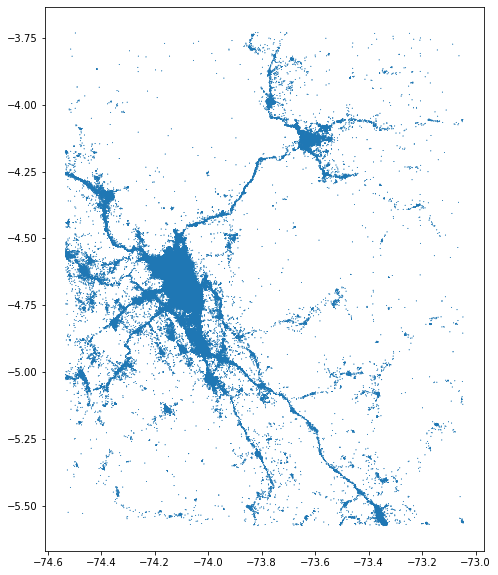

In [30]:
hexgdf = myh3.df_with_hexid_to_gdf(df, hexcolname='_id')
hexgdf.rotate(270, origin = (0,0), use_radians=False).plot()

In [31]:
hexgdf.head()

,_id,level_1,nonresidents,nonresidentsandnonneighbors,residents,totalcounts,time,geometry
0,89660b00037ffff,1356912000000,1.0,1.0,NaN,1.0,2012-12-31,"POLYGON ((5.56844 -73.20195, 5.56700 -73.20301..."
1,89660b00037ffff,1364688000000,0.0,0.0,NaN,0.0,2013-03-31,"POLYGON ((5.56844 -73.20195, 5.56700 -73.20301..."
2,89660b00037ffff,1372550400000,0.0,0.0,NaN,0.0,2013-06-30,"POLYGON ((5.56844 -73.20195, 5.56700 -73.20301..."
3,89660b00037ffff,1380499200000,0.0,0.0,NaN,0.0,2013-09-30,"POLYGON ((5.56844 -73.20195, 5.56700 -73.20301..."
4,89660b00037ffff,1388448000000,0.0,0.0,NaN,0.0,2013-12-31,"POLYGON ((5.56844 -73.20195, 5.56700 -73.20301..."


C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


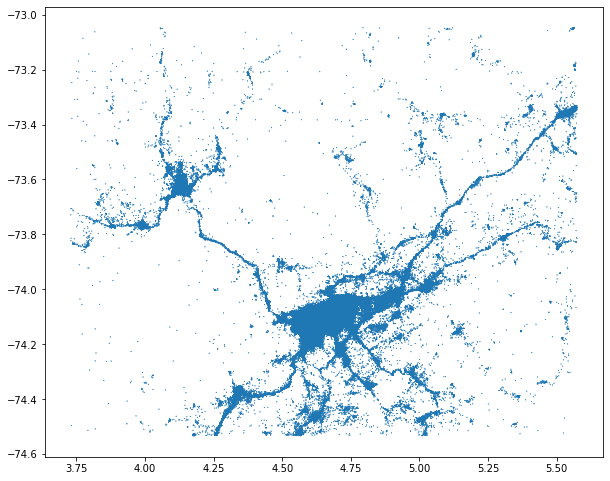

In [16]:
hexgdf = myh3.df_with_hexid_to_gdf(df, hexcolname='_id')
hexgdf.plot()

## B. Transform the dataframe with hexids into a geodataframe with centoids points as geometries

#### Points can be used for spatial joins.

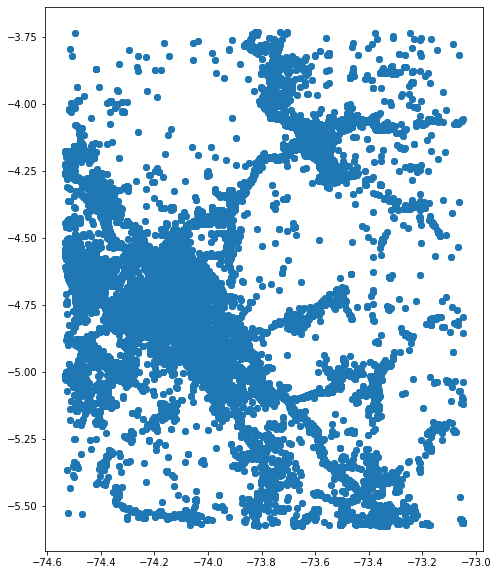

In [12]:
centroidsgdf = myh3.df_with_hexid_to_centroids_gdf(hexgdf, hexcolname='_id')
centroidsgdf.rotate(270, origin = (0,0), use_radians=False).plot()

In [13]:
smooth_hexgdf = myh3.kring_smoother(hexgdf, hexcolname='_id',  metric_col='nonresidents')

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
smooth_hexgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78810 entries, 0 to 78809
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   _id           78810 non-null  object  
 1   nonresidents  78810 non-null  float64 
 2   lat           78810 non-null  float64 
 3   lng           78810 non-null  float64 
 4   geometry      78810 non-null  geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 3.0+ MB


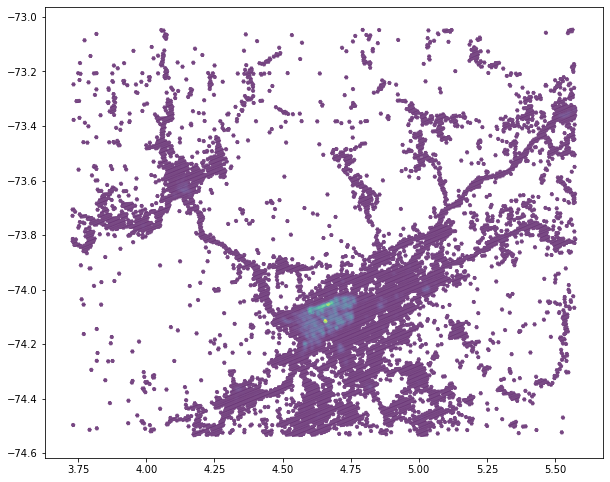

In [15]:
smooth_hexgdf.plot(column='nonresidents')